[ 0.72667143  0.82806275 -0.15693507  1.09684815  1.63611512  0.42705854
 -0.24830583  1.40250153  0.43824139 -0.42109689  1.01057371]
Calc.         Numeric       Delta         Acc.
     -218303       -218303   1.453466e-05  11
    -2.87695      -2.87696  -9.053390e-06   6
    -4407.54      -4407.54   4.814393e-05   8
     4628.25       4628.25   7.435464e-05   8
    -1412.58      -1412.58   2.765349e-05   8
     5215.84       5215.84   4.436563e-05   9
    -5361.97      -5361.97   6.506812e-05   8
     618.927       618.927  -1.550879e-04   7
    -1188.96      -1188.96   8.890352e-05   8
    -532.489      -532.489   1.595720e-05   8
    -11577.3      -11577.3   1.265923e-05   9
Calc.         Numeric       Delta         Acc.
    -3676.81      -3676.81   2.028928e-07  11
    -3.42118      -3.42118  -2.361661e-07   8
    -181.473      -181.473  -6.530533e-06   8
     203.015       203.015  -1.723935e-05   8
    -194.232      -194.232   1.596042e-06   9
     290.626       290.626   7.7713

C:\Users\Tisana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in log
C:\Users\Tisana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in log


|----------|  0% accepted [ 111 secs to go ]
|#---------| 90% accepted [ 99 secs to go ]
|##--------| 90% accepted [ 87 secs to go ]
|###-------| 89% accepted [ 76 secs to go ]
|####------| 89% accepted [ 66 secs to go ]
|#####-----| 84% accepted [ 55 secs to go ]
|######----| 85% accepted [ 44 secs to go ]
|#######---| 84% accepted [ 33 secs to go ]
|########--| 80% accepted [ 22 secs to go ]
|#########-| 80% accepted [ 11 secs to go ]
|##########| 82% accepted [ 0 secs to go ]
HMC: R=10000 / L=100 / eps=0.0035 / Accept=81.6%
best s2 :  9.271688191719882
best alph :  0.016737224846942945
best w :  [-6.80564271 -4.54897081  1.25374272 -3.00750759  7.37815691 -0.12444385
  2.76752209  0.20993861 22.91402406]
RMSE train :  3.0118549466697635
RMSE test :  3.0887831894624247
1
2


C:\Users\Tisana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:215: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Tisana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:216: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Tisana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:217: RuntimeWarning: divide by zero encountered in true_divide


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


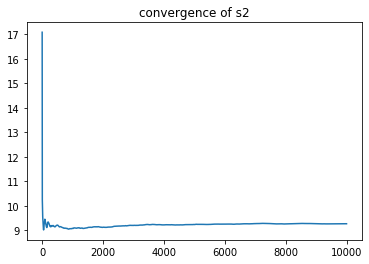

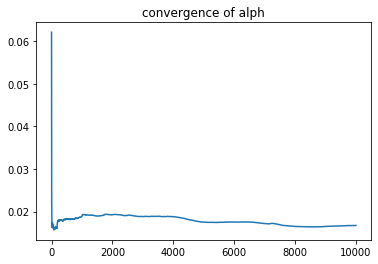

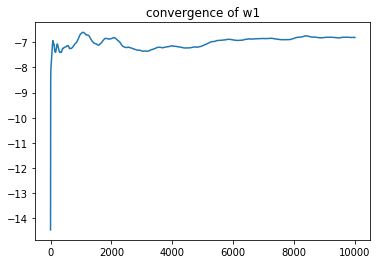

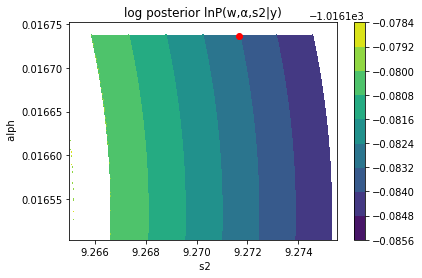

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import lab4_hmc as hmc
from scipy.special import gamma
######################################
######################################
######################################
#import dataset
train_dataset=pd.read_csv("ee-train.csv",header=None).values
attribute_x_list=train_dataset[0,:-1].tolist()
traget_y=train_dataset[0,-1]

train_dataset=np.array(train_dataset[1:,:],dtype=np.float64)
x_train=train_dataset[:,:-1]
y_train=train_dataset[:,-1]

test_dataset=pd.read_csv("ee-test.csv").values
x_test=test_dataset[:,:-1]
y_test=test_dataset[:,-1]


#standardising input x
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

#add bias
x_train=np.concatenate((x_train,np.ones(x_train.shape[0])[:,np.newaxis]),axis=1)
x_test=np.concatenate((x_test,np.ones(x_test.shape[0])[:,np.newaxis]),axis=1)

#parameter
a0=10**(-2)
b0=10**(-4)

######################################
######################################
######################################
#check gradient
def energy_function(x0,f):
    x=f[0]
    y=f[1]
    s2=x0[0]
    alph=x0[1]
    w=x0[2:]
    
    #common term
    N=x.shape[0]
    M=x.shape[1]
    term=(b0**a0)/gamma(a0)
    energy=0
    
    #a
  
    second_term=sum((y-np.matmul(x,w))**2)/(2*s2)
    a=-0.5*N*np.log(2*np.pi*s2)-second_term
    energy-=a
    
  
    #b
    b=0.5*M*np.log((alph/(2*np.pi)))-sum(alph*(w**2)/2)
    energy-=b
  
    #c
    c=np.log(term)-(a0-1)*np.log(alph)-(b0/alph)
    energy-=c
    
    #d
    d=np.log(term)+((a0-1)*np.log(s2))-(b0*s2)
    energy-=d

    #return a,b,c,d,energy
    return energy
 
######################################
######################################
######################################
#check energy function
'''
x0 = np.random.normal(size=11)
x0[0]=np.exp(x0[0])
x0[1]=np.exp(x0[1])
f=[x_train,y_train]
x=f[0]
y=f[1]
s2=x0[0]
alph=x0[1]
w=x0[2:]

#a
a_real=stats.multivariate_normal.logpdf(y,mean=np.matmul(x,w),cov=s2)   
a=energy_function(x0,f)[0]
print("check a : ",np.isclose(a,a_real)) 
print(a,a_real,abs(a-a_real))

#b
b_real=stats.multivariate_normal.logpdf(w,cov=(alph**-1)*np.identity(w.shape[0])) 
b=energy_function(x0,f)[1]
print("check b : ",np.isclose(b,b_real))
print(b,b_real,abs(b_real-b))
#c
c_real=stats.gamma.logpdf(1/alph,a=a0,scale=1/b0)
c=energy_function(x0,f)[2]
print("check c : ",np.isclose(c,c_real))
print(c,c_real,abs(c_real-c))
#d
d_real=stats.gamma.logpdf(s2,a=a0,scale=1/b0)
d=energy_function(x0,f)[3]
print("check d : ",np.isclose(d,d_real))
print(d,d_real,abs(d_real-d))
'''
######################################
######################################
######################################
def grad_function(x0,f):
    x=f[0]
    y=f[1]
    s2=x0[0]
    alph=x0[1]
    w=x0[2:]
    
    #common term
    N=x.shape[0]
    M=x.shape[1]    
    output_w=np.array([0]*len(w))
    output_s2=0
    output_alph=0
    
    #a wrt to w
    a_w=-2*np.matmul((y-np.matmul(x,w)),-x)   
    output_w=output_w-(a_w/(2*s2))
    
    #a wrt alph
    a_alph=0
    output_alph-=a_alph
    
    #a wrt s2
    term=(sum((y-np.matmul(x,w))**2))*(-(s2**-2))
    a_s2=(-0.5*N/s2)-(term/2)
    output_s2-=a_s2
    
    
    #b wrt w
    b_w=-alph*2*w/2
    output_w=output_w-b_w
    
    #b wrt alph
    b_alph=(M/(2*alph))-sum((w**2))/2
    output_alph-=b_alph
    
    #b wrt s2
    b_s2=0
    output_s2-=b_s2
  
    
    #c wrt w

    
    #c wrt alph
    c_alph=(-(a0-1)/alph)+(b0/(alph**2))
    output_alph-=c_alph
    
    #c wrt s2

   
    #d wrt w
    
    #d wrt alph
    
    #d wrt s2
    d_s2=((a0-1)/(s2))-b0
    output_s2-=d_s2
    

    return np.array([output_s2,output_alph]+output_w.tolist())


######################################
######################################
######################################
#check gradient
x0 = np.random.normal(size=11)
x0[0]=np.exp(x0[0])
x0[1]=np.exp(x0[1])
##x0=np.array([5.0,5.0])
print(x0)
f=[x_train,y_train]
hmc.gradient_check(x0, energy_function, grad_function, f)
######################################
######################################
######################################


np.random.seed(seed=1)  # For reproducibility 
eps=0.0035
R = 10000
burn = int(R/10)  
L = 100  
x0 = np.random.normal(size=11)
x0[0]=np.exp(x0[0])
x0[1]=np.exp(x0[1])

S, reject = hmc.sample(x0, energy_function, grad_function, R, L, eps, burn=burn, checkgrad=True, args=[f])
######################################
######################################
######################################
#plot to see convergence of estimate avlue
s2_list=S[:,0]
alph_list=S[:,1]
w_list=S[:,2:]
num=np.arange(0,s2_list.shape[0])

s2_list=np.cumsum(s2_list)/num
alph_list=np.cumsum(alph_list)/num
w1_list=np.cumsum(w_list[:,0])/num

plt.figure()
plt.title("convergence of s2")
plt.plot(num,s2_list)

plt.figure()
plt.title("convergence of alph")
plt.plot(num,alph_list)

plt.figure()
plt.title("convergence of w1")
plt.plot(num,w1_list)

######################################
######################################
######################################
#see RMSE

def RMSE_func(actual,pred):
    #sqrt_diff=np.mean((actual-pred)**2)
    sqrt_diff=sum((actual-pred)**2)
    sqrt_diff=sqrt_diff/actual.shape[0]
    return np.sqrt(sqrt_diff)
final_alph=alph_list[-1]
final_s2=s2_list[-1]
final_w=w_list.sum(axis=0)/10000
print("best s2 : ",final_s2)
print("best alph : ",final_alph)
print("best w : ",final_w)
y_pred_train=np.matmul(x_train,final_w)
y_pred_test=np.matmul(x_test,final_w)

RMSE_train=RMSE_func(y_train,y_pred_train)
RMSE_test=RMSE_func(y_test,y_pred_test)

print("RMSE train : ",RMSE_train)
print("RMSE test : ",RMSE_test)

######################################
######################################
######################################
#plot posterior
def log_posterior(x0,f):
    log_p=-energy_function(x0,f)
    return log_p

log_posterior_list=[]
i=0
for alph in alph_list[-1000:]:
    i+=1
    print(i)
    p_s2=[]
    for s2 in s2_list[-1000:]:

        
        x0=[s2,alph]+final_w.tolist()
        x0=np.array(x0)
        log_prob=log_posterior(x0,[x_train,y_train])
      
        p_s2.append(log_prob)


    log_posterior_list.append(np.array(p_s2))
log_posterior_list=np.array(log_posterior_list)


plt.figure()
plt.title("log posterior lnP(w,α,s2|y)")
plt.contourf(s2_list[-1000:],alph_list[-1000:],log_posterior_list)
plt.colorbar()
plt.scatter(final_s2,final_alph,c="red")
plt.xlabel(" s2")
plt.ylabel(" alph")
plt.show()

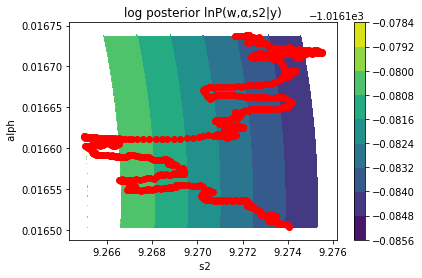

In [4]:
plt.figure()
plt.title("log posterior lnP(w,α,s2|y)")
plt.contourf(s2_list[-1000:],alph_list[-1000:],log_posterior_list)
plt.colorbar()
plt.scatter(s2_list[-1000:],alph_list[-1000:],c="red")
plt.xlabel(" s2")
plt.ylabel(" alph")
plt.show()